<font size=7> Phase Lock Heatmap - chip 21769

# Setup

In [1]:
from human_hip import spike_data
import numpy as np
from human_hip.spike_data import *
import pickle

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
sd = read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-11-e-Hc120523_aav9hckcr1_chip21769/derived/kilosort2/Hc120523_aav9hckcr1_chip21769_121123_2_acqm.zip" )

with open( "OLD_2023-12-11-e-Hc120523_aav9hckcr1_chip21769_theta_spike_locking_s.pkl", 'rb') as file:
    data = pickle.load(file)
angles = data["mean_angle"]
pvals = data["rayleigh_p"]

In [3]:
neuron_x = []
neuron_y = []
neuron_xy = []
for key,val in sd.neuron_data[0].items():
    neuron_x.append( val["position"][0] )
    neuron_y.append( val["position"][1] )
    neuron_xy.append( val["position"] )
neuron_x = np.array(neuron_x)
neuron_y = np.array(neuron_y)

/tmp/ipykernel_1153/283558322.py:4: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for key,val in sd.neuron_data[0].items():


(array([15.,  6.,  5.,  5.,  2.,  5.,  1.,  4.,  3.,  7.]),
 array([1.90975892e-09, 9.70260091e-02, 1.94052016e-01, 2.91078023e-01,
        3.88104031e-01, 4.85130038e-01, 5.82156045e-01, 6.79182052e-01,
        7.76208059e-01, 8.73234067e-01, 9.70260074e-01]),
 <BarContainer object of 10 artists>)

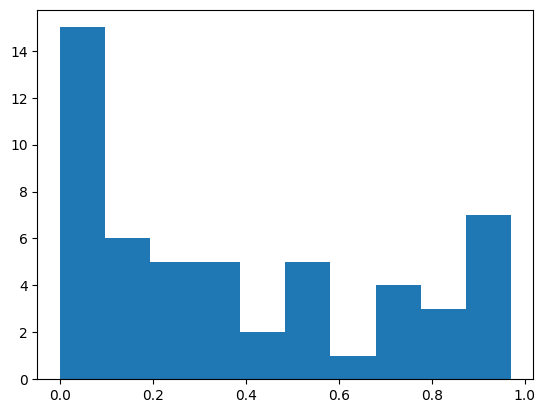

In [4]:
plt.hist(pvals)

In [5]:
pval=.1

sig_x = neuron_x[pvals<pval]
sig_y = neuron_y[pvals<pval]
sig_angles =angles[pvals<pval]
sig_xy = np.array( [ [sig_x[i], sig_y[i]] for i in range(len(sig_x)) ] )

# Plots

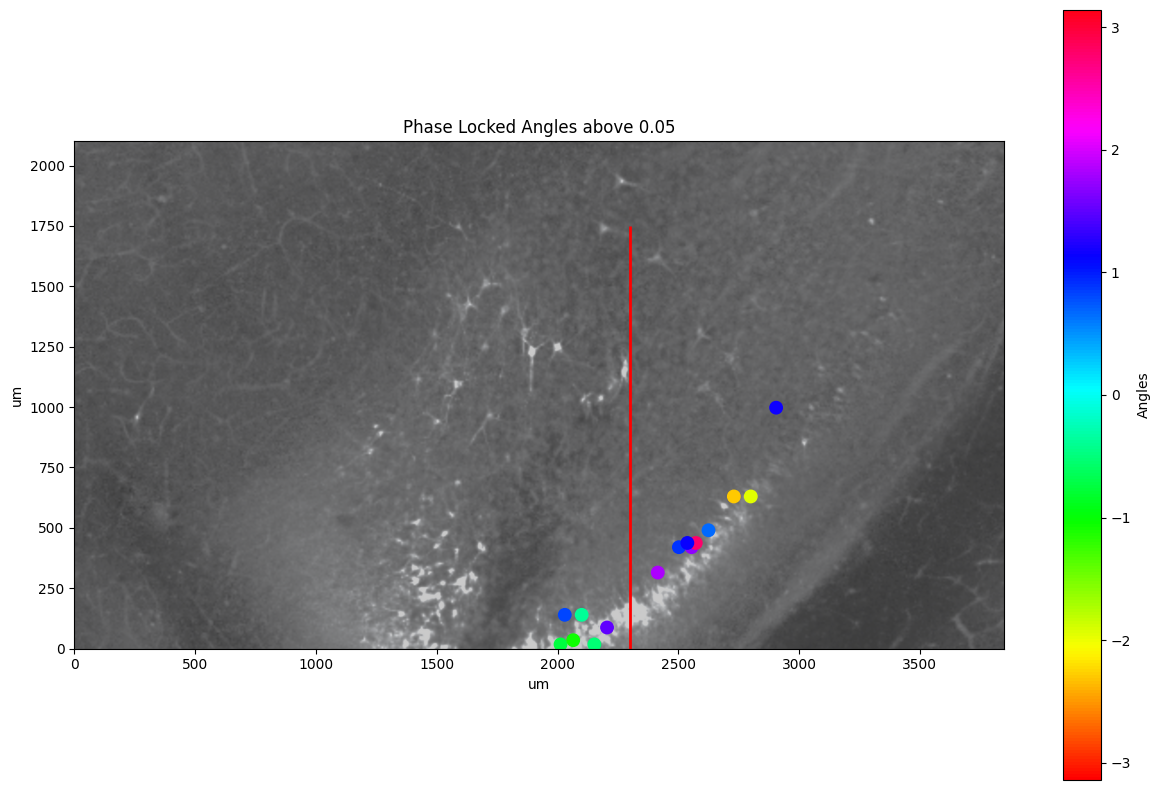

In [6]:
plt.figure(figsize=(15,10))  # Set image size to roughly the shape of the MEA
img = plt.imread("/workspaces/human_hippocampus/data/histology/chip21769_bw2.png")  # Load in image
plt.imshow(img, extent=[0, 3850, 0, 2100])  # Plot image, have it correspond to electrode dimensions

# Scatter plot with colors based on `angles` using the `Spectral` colormap
plt.scatter( sig_x, sig_y, c=sig_angles, cmap='hsv', alpha=1, s=80, vmin=-3.1416, vmax=3.1416)

#plt.xlim(0, 1750)  # Set axis limits to that of the MEA
#plt.ylim(0, 1750)
plt.xlabel('um')  # add axises and title
plt.ylabel('um')
plt.title("Phase Locked Angles above 0.05")
plt.colorbar(label='Angles')  # Add a colorbar to show the mapping of colors to angles


# plt.vlines( 920, 0, 1750, color="red", linewidth=2 )
# plt.hlines( 900, 0, 1750, color="red", linewidth=2 )
# plt.hlines( 1120, 0, 1750, color="orange", linewidth=2 )
# plt.vlines( 955, 0, 1750, color="orange", linewidth=2 )
plt.vlines( 2300, 0, 1750, color="red", linewidth=2 )



In [18]:
group1 = sig_angles[ sig_x<2300 ]
group2 = sig_angles[ sig_x>2300 ]


[Text(0, 1, '1'), Text(0, 2, '2')]

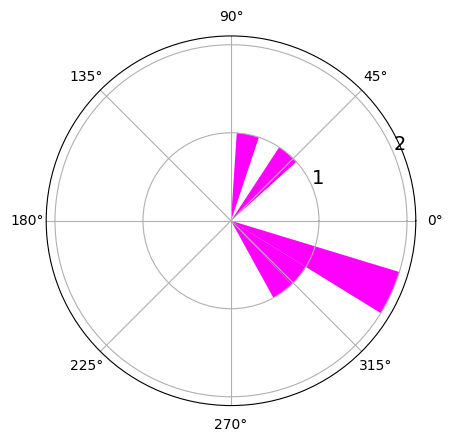

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.hist(group1,  density=False, color="magenta") #bins=4/
ax.set_yticks([1, 2])
ax.set_yticklabels([1, 2], fontsize=14)

[Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3'), Text(0, 4, '4')]

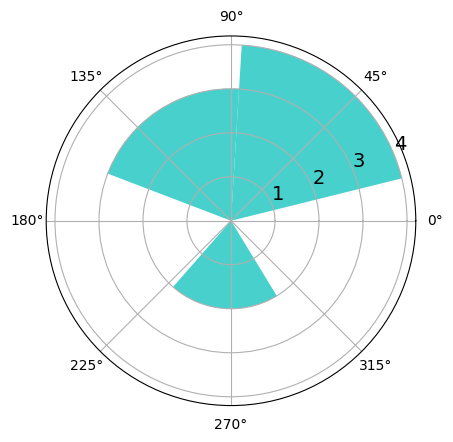

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.hist(group2, bins=4, density=False, color="mediumturquoise")
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels([1, 2, 3, 4], fontsize=14)


(array([3., 0., 0., 0., 0., 3., 0., 0., 0., 3.]),
 array([-0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48, -0.46, -0.44,
        -0.42, -0.4 ]),
 <BarContainer object of 10 artists>)

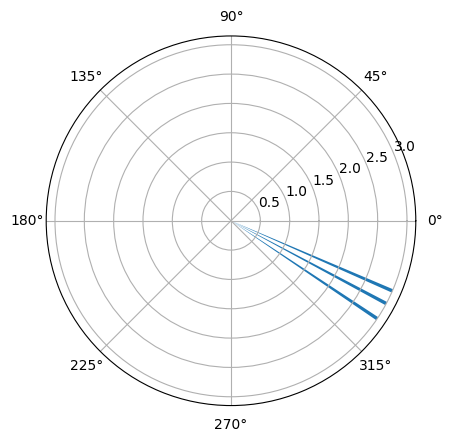

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.hist([-.4,-.4,-.4,  -.5,-.5,-.5, -.6, -.6, -.6],  density=False) #bins=4/

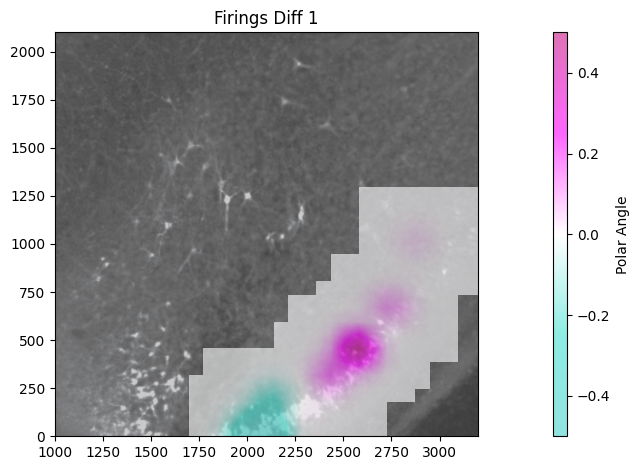

In [7]:
from matplotlib.colors import LinearSegmentedColormap
#cmap =   #LinearSegmentedColormap.from_list("my_cmap", ['white', 'red' ])
cmap = LinearSegmentedColormap.from_list("my_cmap", ['mediumturquoise', 'turquoise', "white" , 'magenta' , 'mediumvioletred' ])

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from scipy.ndimage import gaussian_filter

img = plt.imread("/workspaces/human_hippocampus/data/histology/chip21769_bw2.png") 

fr = np.abs(sig_angles+.4) - np.mean(np.abs(sig_angles+.4))

mean1 = np.mean(fr)
std1 = np.std(fr)


# Determine global min and max for the colorbar
# global_min = np.min(fr) #np.mean(fr)-2*np.std(fr) 
# global_max = np.max(fr) #np.mean(fr)+2*np.std(fr) 
# global_min = np.mean(fr)-np.std(fr) 
# global_max = np.mean(fr)+np.std(fr) 


# Normalize both datasets based on the global min and max
#norm = plt.Normalize( vmin= np.mean(fr)-np.std(fr), vmax= np.mean(fr)+np.std(fr) )
norm = plt.Normalize( vmin= -.5, vmax= .5)
#plt.figure(figsize=(1, 6))

gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05])

plt.imshow(img, extent=[0, 3850, 0, 2100])
heatmap1, xedges1, yedges1 = np.histogram2d(sig_x, sig_y, bins=30, weights=fr*1.2, range=[[1000, 3200], [0,2100]])
heatmap1 = gaussian_filter(heatmap1, sigma=1)
heatmap1 = np.ma.masked_where(heatmap1 == 0, heatmap1)
im1 = plt.imshow(heatmap1.T, extent=[1000, 3200, 0,2100], origin='lower', cmap=cmap, norm=norm, alpha=0.6, interpolation='bilinear') #"PuOr"
plt.title('Firings Diff 1')

#cbar_ax = plt.subplot(gs[2])
#cbar = plt.colorbar(im2, cax=cbar_ax)
#cbar.set_label('Firing Differences')

cbar_ax = plt.subplot(gs[0, 2])  # Add the colorbar to the third column in the grid
cbar = plt.colorbar(im1, cax=cbar_ax)  # Create the colorbar based on the heatmap
cbar.set_label('Polar Angle')

plt.tight_layout()
plt.show()

(0.0, 2100.0)

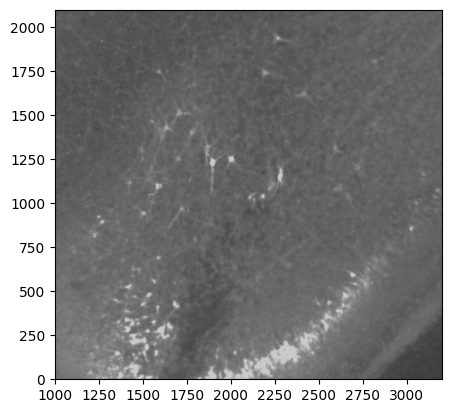

In [34]:

img = plt.imread("/workspaces/human_hippocampus/data/histology/chip21769_bw2.png") 
plt.imshow(img, extent=[0, 3850, 0, 2100])
plt.xlim(1000, 3200)
plt.ylim(0, 2100)





In [ ]:


# Normalize both datasets based on the global min and max
#norm = plt.Normalize( vmin= np.mean(fr)-np.std(fr), vmax= np.mean(fr)+np.std(fr) )
norm = plt.Normalize( vmin= -.5, vmax= .5)
#plt.figure(figsize=(1, 6))

gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05])

plt.imshow(img, extent=[0, 3850, 0, 2100])
heatmap1, xedges1, yedges1 = np.histogram2d(sig_x, sig_y, bins=30, weights=fr*1.2, range=[[1000, 3200], [0,2100]])
heatmap1 = gaussian_filter(heatmap1, sigma=1)
heatmap1 = np.ma.masked_where(heatmap1 == 0, heatmap1)
im1 = plt.imshow(heatmap1.T, extent=[1000, 3200, 0,2100], origin='lower', cmap=cmap, norm=norm, alpha=0.6, interpolation='bilinear') #"PuOr"
plt.title('Firings Diff 1')

#cbar_ax = plt.subplot(gs[2])
#cbar = plt.colorbar(im2, cax=cbar_ax)
#cbar.set_label('Firing Differences')

cbar_ax = plt.subplot(gs[0, 2])  # Add the colorbar to the third column in the grid
cbar = plt.colorbar(im1, cax=cbar_ax)  # Create the colorbar based on the heatmap
cbar.set_label('Polar Angle')

plt.tight_layout()
plt.show()

/tmp/ipykernel_1153/823582042.py:35: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  plt.scatter(sd.neuron_data[0][9]["position"][0], sd.neuron_data[0][9]["position"][1], s=100, c="black")
/tmp/ipykernel_1153/823582042.py:36: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  plt.scatter(sd.neuron_data[0][19]["position"][0], sd.neuron_data[0][19]["position"][1], s=100, c="black")


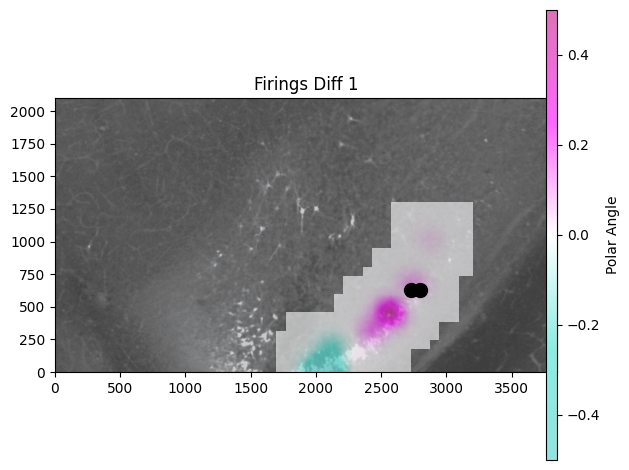

In [9]:

cmap = LinearSegmentedColormap.from_list("my_cmap", ['mediumturquoise', 'turquoise', "white" , 'magenta' , 'mediumvioletred' ])
img = plt.imread("/workspaces/human_hippocampus/data/histology/chip21769_bw2.png") 

fr = np.abs(sig_angles+.4) - np.mean(np.abs(sig_angles+.4))

mean1 = np.mean(fr)
std1 = np.std(fr)


# Determine global min and max for the colorbar
# global_min = np.min(fr) #np.mean(fr)-2*np.std(fr) 
# global_max = np.max(fr) #np.mean(fr)+2*np.std(fr) 
global_min = np.mean(fr)-np.std(fr) 
global_max = np.mean(fr)+np.std(fr) 


# Normalize both datasets based on the global min and max
#norm = plt.Normalize( vmin= np.mean(fr)-np.std(fr), vmax= np.mean(fr)+np.std(fr) )
norm = plt.Normalize( vmin= -.5, vmax= .5)
#plt.figure(figsize=(1, 6))

gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05])

plt.imshow(img, extent=[0, 3850, 0, 2100])
heatmap1, xedges1, yedges1 = np.histogram2d(sig_x, sig_y, bins=30, weights=fr*1.2, range=[[1000, 3200], [0,2100]])
heatmap1 = gaussian_filter(heatmap1, sigma=1)
heatmap1 = np.ma.masked_where(heatmap1 == 0, heatmap1)
im1 = plt.imshow(heatmap1.T, extent=[1000, 3200, 0,2100], origin='lower', cmap=cmap, norm=norm, alpha=0.6, interpolation='bilinear') #"PuOr"
plt.title('Firings Diff 1')

#cbar_ax = plt.subplot(gs[2])
#cbar = plt.colorbar(im2, cax=cbar_ax)
#cbar.set_label('Firing Differences')

plt.scatter(sd.neuron_data[0][9]["position"][0], sd.neuron_data[0][9]["position"][1], s=100, c="black")
plt.scatter(sd.neuron_data[0][19]["position"][0], sd.neuron_data[0][19]["position"][1], s=100, c="black")

cbar_ax = plt.subplot(gs[0, 2])  # Add the colorbar to the third column in the grid
cbar = plt.colorbar(im1, cax=cbar_ax)  # Create the colorbar based on the heatmap
cbar.set_label('Polar Angle')

plt.tight_layout()
plt.show()